In [5]:
#caution
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Github/flare-cme/2023

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Github/flare-cme/2023


In [6]:
!pip install sunpy[all] lime

from IPython.display import clear_output
clear_output()

In [7]:
import numpy as np
import pandas as pd

In [8]:
positive = pd.read_csv('positive_2023.csv')
positive["CME"] = 1
negative = pd.read_csv('negative_2023.csv')
negative["CME"] = 0

In [9]:
data = pd.concat([positive, negative], ignore_index=True)

In [10]:
data

,Unnamed: 0,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,...,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,HARPNUM,NOAA,Class,Peak Time,CME
0,0,2.246101e+22,107.736,0.021724,15533.100,54.882,2975.118,77.983,0.041413,59.541,...,7.077275e+23,50.329,945.314636,4.805,745.287,377,11158,X2.2,2011.02.14_01:56_TAI,1
1,1,2.235615e+22,93.863,-0.001943,10914.060,44.178,1636.710,56.639,-0.003942,50.680,...,4.733711e+23,43.479,961.502686,4.303,63.441,401,11166,M2.0,2011.03.06_14:30_TAI,1
2,2,6.039302e+22,91.233,0.007535,9912.353,29.044,4229.148,49.560,0.015028,41.150,...,1.074422e+24,35.873,1934.446167,4.865,615.008,393,11164,M3.7,2011.03.06_20:12_TAI,1
3,3,2.384940e+22,109.706,0.009620,3703.910,13.500,1505.331,47.602,0.030907,34.321,...,1.879337e+23,28.525,970.551636,3.971,367.530,637,11226,M2.5,2011.06.06_06:41_TAI,1
4,4,1.989983e+22,109.891,0.032849,12062.610,44.090,2547.054,73.681,0.079865,53.270,...,5.269515e+23,43.929,1259.099854,4.777,1080.528,750,11261,M6.0,2011.08.02_13:48_TAI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,398,5.430287e+22,99.029,-0.011452,9868.051,28.932,4697.934,53.649,-0.023844,42.053,...,9.912650e+23,36.118,2082.468750,5.014,866.194,9857,13380,M1.7,2023.08.01_14:52_TAI,0
576,399,5.930773e+22,86.219,-0.002321,9121.528,24.733,4150.896,45.219,-0.005100,39.407,...,1.001799e+24,33.674,1799.069092,4.791,191.967,9857,13380,M2.0,2023.08.02_11:55_TAI,0
577,400,1.676336e+22,114.987,-0.002366,5347.461,35.007,1703.561,67.512,-0.007370,50.484,...,2.189089e+23,40.006,1182.782227,4.134,72.942,10020,13421,M2.0,2023.09.04_08:12_TAI,0
578,401,4.410597e+22,109.431,-0.007359,8622.373,41.853,3709.351,64.375,-0.018850,51.621,...,8.453395e+23,43.075,2772.556396,4.648,543.226,10046,13423,M2.5,2023.09.11_07:07_TAI,0


## Plotting histograms to see the variability of the data

In [11]:
data = data.drop(['Unnamed: 0','HARPNUM','NOAA','Class','Peak Time'], axis=1)

In [12]:
X = data.drop(columns=['CME'])
y = data['CME']

In [13]:
from sklearn.preprocessing import MinMaxScaler

def normalize_the_data(data):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    return normalized_data

xn = normalize_the_data(X)

In [14]:
columns = ['USFLUX', 'MEANGBT', 'MEANJZH', 'MEANPOT', 'SHRGT45', 'TOTUSJH',
       'MEANGBH', 'MEANALP', 'MEANGAM', 'MEANGBZ', 'MEANJZD', 'TOTUSJZ',
       'SAVNCPP', 'TOTPOT', 'MEANSHR', 'AREA_ACR', 'R_VALUE', 'ABSNJZH','CME']

df = pd.concat([pd.DataFrame(xn), pd.DataFrame(y)], axis=1)
df.columns = columns

df

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,CME
0,0.110342,0.561371,0.690394,0.605487,0.871939,0.204824,0.753790,0.678962,0.937815,0.588089,0.485318,0.202952,0.118421,0.133011,0.900055,0.128267,0.875866,0.193786,1
1,0.109806,0.406908,0.507880,0.415653,0.699841,0.109642,0.451634,0.462796,0.712539,0.386897,0.506505,0.132131,0.033120,0.088537,0.712075,0.130544,0.784360,0.016239,1
2,0.304362,0.377625,0.580972,0.374485,0.456517,0.294006,0.351421,0.553205,0.470255,0.396149,0.289121,0.311960,0.342892,0.202599,0.503348,0.267394,0.886803,0.159862,1
3,0.117444,0.583305,0.597047,0.119330,0.206602,0.100299,0.323702,0.628887,0.296639,0.515527,0.401939,0.123382,0.194100,0.034370,0.301701,0.131817,0.723843,0.095421,1
4,0.097242,0.585365,0.776187,0.462856,0.698426,0.174382,0.692889,0.862225,0.778385,0.569345,0.665822,0.172255,0.447773,0.098705,0.724424,0.172403,0.870762,0.281080,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,0.273212,0.464426,0.434547,0.372664,0.454716,0.327344,0.409306,0.367939,0.493212,0.500956,0.333803,0.317297,0.310307,0.186818,0.510071,0.288215,0.913963,0.225269,0
576,0.298811,0.321798,0.504959,0.341983,0.387205,0.288441,0.289967,0.457276,0.425942,0.367071,0.336442,0.283193,0.101875,0.188817,0.443002,0.248353,0.873314,0.049706,0
577,0.081199,0.642105,0.504611,0.186876,0.552390,0.114397,0.605558,0.446459,0.707556,0.584889,0.557195,0.137324,0.025722,0.040248,0.616767,0.161668,0.753555,0.018713,0
578,0.221055,0.580244,0.466112,0.321469,0.662460,0.257040,0.561149,0.391743,0.736462,0.515134,0.440826,0.330976,0.043403,0.159126,0.700988,0.385279,0.847248,0.141171,0


In [15]:
pos = df[df['CME'] == 1]
neg = df[df['CME'] == 0]

## ANALYSIS

In [16]:
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_classification

X = df.drop(columns=['CME'])
y = df['CME']

from sklearn.feature_selection import SelectKBest, f_classif

N_features = 18
a = np.array(X)
b = np.array(y)

selector = SelectKBest(f_classif, k=N_features)
selector.fit(a,b)
scores = selector.scores_
print(scores)



[ 9.8080822   0.02124909  6.76292372 11.16277767  4.15641313 17.98031364
  9.25748906  8.82346894  4.68849207  1.57075683  2.7683905  15.84512804
  1.53635948 15.15807641  4.23429083 12.25926284  6.19580081  0.214951  ]


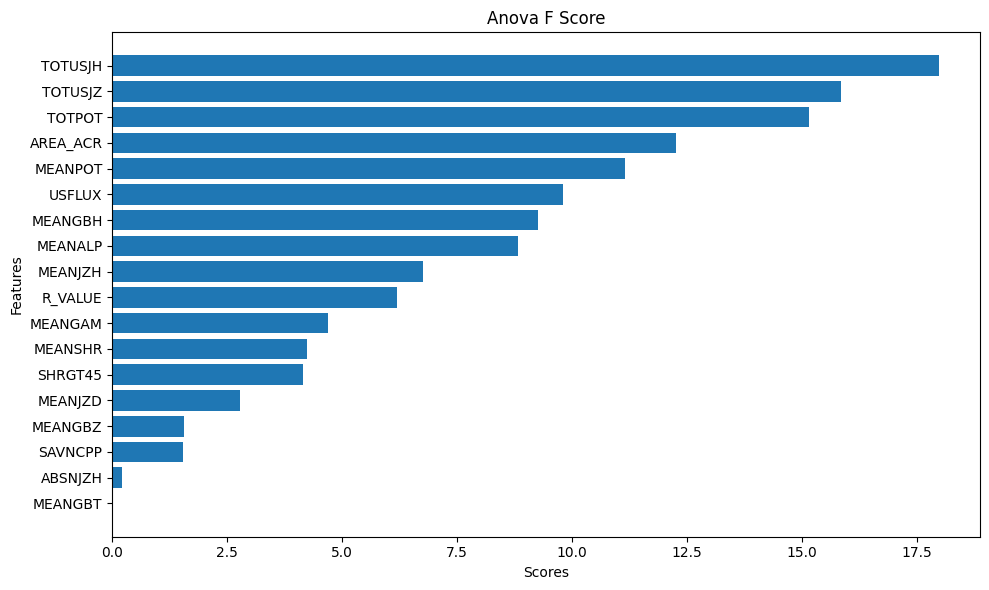

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X.columns
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores}).sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('Anova F Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

ordered_features = scores_df['Feature'].tolist()
ordered_features.append("CME")

In [18]:
df_reordered = df.loc[:, ordered_features]

In [19]:
df_reordered

,TOTUSJH,TOTUSJZ,TOTPOT,AREA_ACR,MEANPOT,USFLUX,MEANGBH,MEANALP,MEANJZH,R_VALUE,MEANGAM,MEANSHR,SHRGT45,MEANJZD,MEANGBZ,SAVNCPP,ABSNJZH,MEANGBT,CME
0,0.204824,0.202952,0.133011,0.128267,0.605487,0.110342,0.753790,0.678962,0.690394,0.875866,0.937815,0.900055,0.871939,0.485318,0.588089,0.118421,0.193786,0.561371,1
1,0.109642,0.132131,0.088537,0.130544,0.415653,0.109806,0.451634,0.462796,0.507880,0.784360,0.712539,0.712075,0.699841,0.506505,0.386897,0.033120,0.016239,0.406908,1
2,0.294006,0.311960,0.202599,0.267394,0.374485,0.304362,0.351421,0.553205,0.580972,0.886803,0.470255,0.503348,0.456517,0.289121,0.396149,0.342892,0.159862,0.377625,1
3,0.100299,0.123382,0.034370,0.131817,0.119330,0.117444,0.323702,0.628887,0.597047,0.723843,0.296639,0.301701,0.206602,0.401939,0.515527,0.194100,0.095421,0.583305,1
4,0.174382,0.172255,0.098705,0.172403,0.462856,0.097242,0.692889,0.862225,0.776187,0.870762,0.778385,0.724424,0.698426,0.665822,0.569345,0.447773,0.281080,0.585365,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,0.327344,0.317297,0.186818,0.288215,0.372664,0.273212,0.409306,0.367939,0.434547,0.913963,0.493212,0.510071,0.454716,0.333803,0.500956,0.310307,0.225269,0.464426,0
576,0.288441,0.283193,0.188817,0.248353,0.341983,0.298811,0.289967,0.457276,0.504959,0.873314,0.425942,0.443002,0.387205,0.336442,0.367071,0.101875,0.049706,0.321798,0
577,0.114397,0.137324,0.040248,0.161668,0.186876,0.081199,0.605558,0.446459,0.504611,0.753555,0.707556,0.616767,0.552390,0.557195,0.584889,0.025722,0.018713,0.642105,0
578,0.257040,0.330976,0.159126,0.385279,0.321469,0.221055,0.561149,0.391743,0.466112,0.847248,0.736462,0.700988,0.662460,0.440826,0.515134,0.043403,0.141171,0.580244,0


In [20]:
pos = df_reordered[df_reordered['CME'] == 1]
neg = df_reordered[df_reordered['CME'] == 0]

In [21]:
min_a = pos.index.min()
max_a = pos.index.max()

pos['normalized_event_number'] = (pos.index - min_a) / (max_a - min_a)

min_b = neg.index.min()
max_b = neg.index.max()

neg['normalized_event_number'] = (neg.index - min_b) / (max_b - min_b)

<ipython-input-21-9e7b8b34ef1e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['normalized_event_number'] = (pos.index - min_a) / (max_a - min_a)
<ipython-input-21-9e7b8b34ef1e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg['normalized_event_number'] = (neg.index - min_b) / (max_b - min_b)


In [22]:
import numpy as np
import matplotlib.pyplot as plt

a = 1
plt.figure(figsize=(12, 80))

for i in range(len(columns) - 1):
    mean_pos = np.mean(pos.iloc[:, i])
    mean_neg = np.mean(neg.iloc[:, i])
    std_pos = np.std(pos.iloc[:,i])
    std_neg = np.std(neg.iloc[:,i])

    plt.subplot(len(columns), 2, a)
    plt.scatter(pos["normalized_event_number"], pos.iloc[:, i], alpha=0.7, label="Positive Events")
    plt.scatter(neg["normalized_event_number"], neg.iloc[:, i], alpha=0.7, label="Negative Events")
    plt.axhline(mean_pos, color='b', label=f"Mean Pos: {mean_pos:.2f}")
    plt.axhline(mean_neg, color='r', label=f"Mean Neg: {mean_neg:.2f}")
    plt.xlabel("Normalized Event Number")
    plt.ylabel(ordered_features[i])
    plt.title(f"{ordered_features[i]} vs Normalized Event Number")
    plt.legend()

    plt.subplot(len(columns), 2, a + 1)
    plt.hist(pos.iloc[:, i], bins=20, density=True, alpha=0.7)
    plt.hist(neg.iloc[:, i], bins=20, density=True, alpha=0.7)
    plt.axvline(mean_pos, color='b', label=f"Mean Pos: {mean_pos:.2f}")
    plt.axvline(mean_neg, color='r', label=f"Mean Neg: {mean_neg:.2f}")
    ymin, ymax = plt.ylim()
    plt.fill_betweenx([ymin, ymax], mean_pos - std_pos, mean_pos + std_pos, color='b', alpha=0.2)
    plt.fill_betweenx([ymin, ymax], mean_neg - std_neg, mean_neg + std_neg, color='r', alpha=0.2)
    plt.xlabel(ordered_features[i])
    plt.ylabel('Probability Density')
    plt.title(f'PDF of {ordered_features[i]}')
    plt.legend()

    a += 2

plt.tight_layout()
plt.savefig("2023_parameters_pdf.jpeg")
plt.show()

Output hidden; open in https://colab.research.google.com to view.